In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, decomposition, datasets

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
train = pd.read_csv("/content/drive/My Drive/Copy of HAR dataset.csv", delimiter=';')
train

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,jose_carlos,Man,75,"1,67",67,"24,0",2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165629,jose_carlos,Man,75,"1,67",67,"24,0",-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking
165630,jose_carlos,Man,75,"1,67",67,"24,0",-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,walking
165631,jose_carlos,Man,75,"1,67",67,"24,0",-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,walking


In [25]:
train['gender'] = train['gender'].apply(lambda x: 0 if x=='Woman' else 1)
train.head()
from sklearn.utils import shuffle
train = shuffle(train)

In [26]:
x = train.iloc[:, 6:-1]
y = train.iloc[:, -1]
y

121839    standingup
76616       standing
39944        sitting
14758        sitting
13658        sitting
             ...    
90445       standing
23388        sitting
44143        sitting
107236      standing
18517        sitting
Name: class, Length: 165633, dtype: object

In [27]:
index = x[x.z4 == '-14420-11-2011 04:50:23.713'].index
x.drop(index, inplace=True)
y.drop(index, inplace=True)


In [28]:
# for i in range(len(y)):
#     if(y[i] == "sitting"): 
#         y[i] = 1
#     if(y[i] == "sittingdown"): 
#         y[i] = 2
#     if(y[i] == "standing"): 
#         y[i] = 3
#     if(y[i] == "standingup"): 
#         y[i] = 4
#     if(y[i] == "walking"): 
#         y[i] = 5

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(124224, 12)
(41408, 12)
(124224,)
(41408,)


In [30]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain ) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
sgd.score(xtest, ytest)

0.7635239567233385

In [32]:
sgd.score(xtrain, ytrain)

0.7613424137042761

In [33]:
n = len(x)
j = 0
x1 = x.to_numpy()
y1 = y.to_numpy()
for i in range(3):
    xtest = x1[j:j+n//3]
    ytest = y1[j:j+n//3]
    xtrain = np.concatenate( (x1[:j],x1[j+n//3:]))
    ytrain = np.concatenate( (y1[:j],y1[j+n//3:]))
    sgd.fit(xtrain[:1000], ytrain[:1000])
    j+=n//3
    print(sgd.score(xtest, ytest))


0.6973917768520196
0.5730845861257019
0.7781199058141641


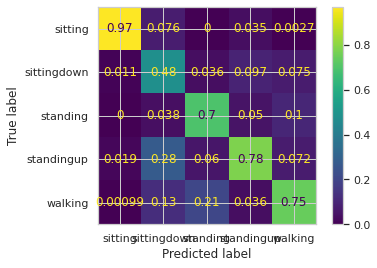

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd, xtest, ytest,  normalize = 'pred')
sns.set(font_scale=0.75)
plt.show()

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qd = QuadraticDiscriminantAnalysis()

In [36]:
qd.fit(xtrain, ytrain)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [37]:
qd.score(xtest, ytest)

0.9047817424379642

In [38]:
qd.score(xtrain, ytrain)

0.9050913767184076

In [39]:
n = len(x)
j = 0
x1 = x.to_numpy()
y1 = y.to_numpy()
for i in range(3):
    xtest = x1[j:j+n//3]
    ytest = y1[j:j+n//3]
    xtrain = np.concatenate( (x1[:j],x1[j+n//3:]))
    ytrain = np.concatenate( (y1[:j],y1[j+n//3:]))
    qd.fit(xtrain[:1000], ytrain[:1000])
    j+=n//3
    print(qd.score(xtest, ytest))


0.9141641007063938
0.9083680492664372
0.9069009237456982


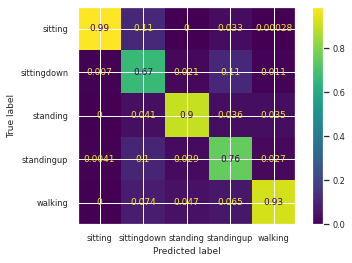

In [40]:
plot_confusion_matrix(qd, xtest, ytest,  normalize = 'pred')
sns.set(font_scale=0.75)
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 500)
lr.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr.score(xtest,ytest)

0.7976634667632675

In [43]:
lr.score(xtrain, ytrain)

0.7984187933563963

In [44]:
ypred = lr.predict(xtest)
ypred

array(['sitting', 'walking', 'walking', ..., 'standing', 'sitting',
       'sitting'], dtype=object)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred, labels = ['sitting' ,'sittingdown' ,'standing' ,'standingup' ,'walking'])

array([[16846,    49,     0,    48,     9],
       [  235,  2127,   872,   445,   307],
       [    0,    41, 13424,    21,  2146],
       [  153,   514,   767,  2362,   292],
       [   14,   456,  4501,   301,  9280]])

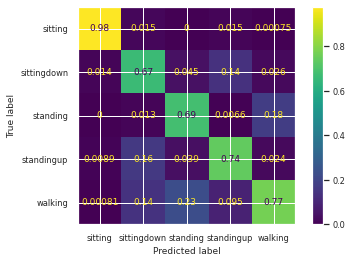

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, xtest, ytest,  normalize = 'pred')
sns.set(font_scale=0.75)
plt.show()

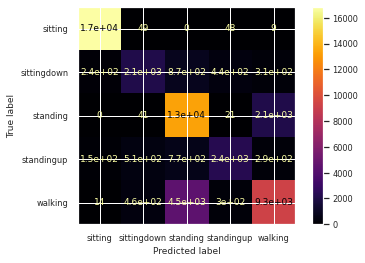

In [47]:
plot_confusion_matrix(lr, xtest, ytest,  cmap = 'inferno')
sns.set(font_scale=0.75)
plt.show()

In [48]:
n = len(x)
j = 0
x1 = x.to_numpy()
y1 = y.to_numpy()
for i in range(3):
    xtest = x1[j:j+n//3]
    ytest = y1[j:j+n//3]
    xtrain = np.concatenate( (x1[:j],x1[j+n//3:]))
    ytrain = np.concatenate( (y1[:j],y1[j+n//3:]))
    lr.fit(xtrain[:1000], ytrain[:1000])
    j+=n//3
    print(lr.score(xtest, ytest))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7941496105777939


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8006158304654953
0.801593914145988


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(xtrain[:20000], ytrain[:20000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
svm.score(xtest, ytest)

0.8862887158123528

In [51]:
svm.score(xtrain, ytrain)

0.8849595189364439

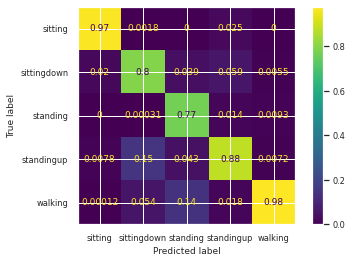

In [52]:
plot_confusion_matrix(svm, xtest, ytest,  normalize = 'pred')
sns.set(font_scale=0.75)
plt.show()

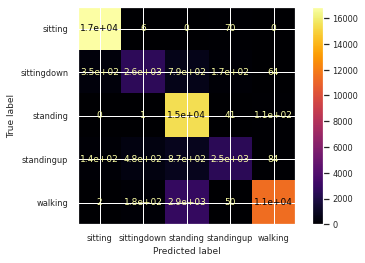

In [53]:
ypred = svm.predict(xtest)
plot_confusion_matrix(svm, xtest, ytest,  cmap = 'inferno')
sns.set(font_scale=0.75)
plt.show()

In [54]:
n = len(x)
j = 0
x1 = x
y1 =  y
x1 = x.to_numpy()
y1 = y.to_numpy()
for i in range(3):
    xtest = x1[j:j+n//3]
    ytest = y1[j:j+n//3]
    xtrain = np.concatenate( (x1[:j],x1[j+n//3:]))
    ytrain = np.concatenate( (y1[:j],y1[j+n//3:]))
    svm.fit(xtrain[:1000], ytrain[:1000])
    print(svm.score(xtest, ytest))
    j+=n//3

0.7749501901829379
0.7686288715812353
0.7688281108494838


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 16)


In [56]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rf.score(xtest, ytest)

0.9907082050353196

In [58]:
rf.score(xtrain ,ytrain)

0.996395645795222

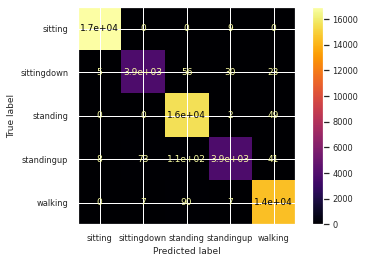

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, xtest, ytest,  cmap = 'inferno')
sns.set(font_scale=0.75)
plt.show()

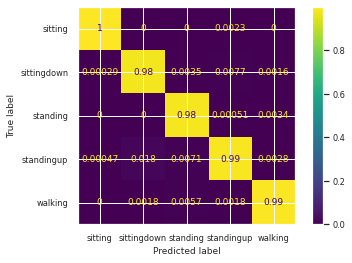

In [60]:
plot_confusion_matrix(rf, xtest, ytest,  normalize = 'pred')
sns.set(font_scale=0.75)
plt.show()

In [61]:
n = len(x)
j = 0
x1 = x
y1 =  y
x1 = x.to_numpy()
y1 = y.to_numpy()
for i in range(3):
    xtest = x1[j:j+n//3]
    ytest = y1[j:j+n//3]
    xtrain = np.concatenate( (x1[:j],x1[j+n//3:]))
    ytrain = np.concatenate( (y1[:j],y1[j+n//3:]))
    rf = RandomForestClassifier()
    rf.fit(xtrain, ytrain)
    print(rf.score(xtest, ytest))
    del(rf)
    j+=n//3

0.9947292157217895
0.9945118637927911
0.9943126245245426


In [62]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [63]:
act = ['relu', 'identity','logistic','tanh']
alpha = [1, 0.1, 0.05, 0.01]
acc = []
for a in alpha:
  for ac in act:
    nn = MLPClassifier(alpha= a, activation= ac)
    nn.fit(xtrain, ytrain)
    acc.append(nn.score(xtest, ytest))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
print(acc)

[0.9703495743524724, 0.8209020105053433, 0.9695707299402282, 0.9677956891867415, 0.9826842963231298, 0.8097083861619272, 0.9794421300489042, 0.9714725593189639, 0.9712914327114653, 0.8213004890418403, 0.9807462416228944, 0.9737547545734468, 0.985727223329107, 0.8122803839884079, 0.982267705125883, 0.9749139648614381]


In [65]:
nn.score(xtest, ytest)

0.9749139648614381

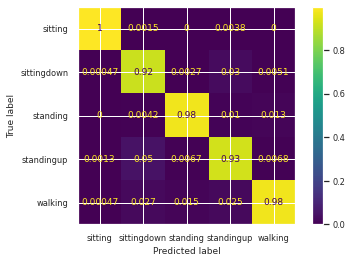

In [66]:
plot_confusion_matrix(nn, xtest, ytest,  normalize = 'pred')
sns.set(font_scale=0.75)
plt.show()

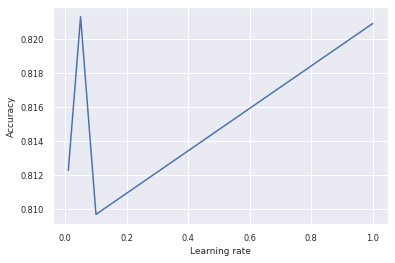

In [75]:
acc1 = []
j = 1
for i in alpha:
  acc1.append(acc[j])
  j+=4
plt.ylabel("Accuracy")
plt.xlabel("Learning rate")
plt.plot(alpha, acc1)

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(xtrain, ytrain)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
kmeans.score(xtest, ytest)

-509296424.701004